#Bài tập thực hành - Lập trình máy học cho python - CS116.M11



MSSV: 19521299

Tên: Nguyễn Chí Cường

Ngày: 12/10/2021

Tuần 6

In [1]:
#import thư viện
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

##Bước 1: Data Wine.csv

In [4]:
#Bước 1: bảng dữ liệu Wine.csv
df_wine = pd.read_csv('Wine.csv')
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


##Bước 2: Scale các feature về đoạn [0,1]

In [5]:
#Bước 2: Scale các feature về đoạn [0,1]
import pandas as pd
from sklearn import preprocessing

x = df_wine.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
del df[13]

In [6]:
data = np.array(df)
class_ = np.array(df_wine["Customer_Segment"])

##Bước 3: Dùng PCA để giảm số chiều

In [7]:
#Bước 3: Dùng PCA để giảm số chiều
pca = PCA(n_components=2)
train_ = pca.fit_transform(data)

##Bước 4: Chia tập dữ liệu

In [8]:
#Bước 4: Chia tập dữ liệu thành 2 phần có số nhãn đầy đủ, tỉ lệ Train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(train_, class_, test_size=0.2, random_state=0)

##Bước 5: Sử dụng mô hình Logistic Regression

In [9]:
#Bước 5: Sử dụng mô hình Logistic Regression để phân lớp
#model logistic regression
model = LogisticRegression(solver='liblinear', random_state=0)
#Train model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##Bước 6: đánh giá độ chính xác (Accuracy)

In [10]:
#Bước 6: đánh giá độ chính xác (Accuracy)
#predict giá trị
predict_test = model.predict(X_test)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



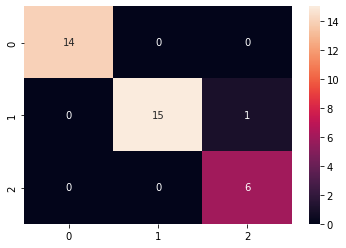

In [11]:
cf_matrix = confusion_matrix(y_test, predict_test)
sns.heatmap(cf_matrix, annot=True)

###Đánh giá với Cross-Validation

In [12]:
#Cross-validation
from sklearn.model_selection import cross_val_score, ShuffleSplit
def get_CV(cv):
  scores = cross_val_score(model, X_test, y_test, cv=cv)
  return scores

In [13]:
#cv = range(4)
for num in range(4):
  scores = get_CV(num+2)
  print("Với number =", num+2)
  print("Accuracy: ", scores.mean())
  print("Độ lệch chuẩn: ", scores.std())
  print("-----------------------------------------")

Với number = 2
Accuracy:  0.9166666666666667
Độ lệch chuẩn:  0.08333333333333331
-----------------------------------------
Với number = 3
Accuracy:  0.9722222222222222
Độ lệch chuẩn:  0.039283710065919325
-----------------------------------------
Với number = 4
Accuracy:  0.9722222222222222
Độ lệch chuẩn:  0.048112522432468836
-----------------------------------------
Với number = 5
Accuracy:  0.9714285714285715
Độ lệch chuẩn:  0.05714285714285716
-----------------------------------------


In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores_other = get_CV(num+2)
print("Accuracy: ", scores.mean())
print("Độ lệch chuẩn: ", scores.std())

Accuracy:  0.9714285714285715
Độ lệch chuẩn:  0.05714285714285716
